## Data Operation: ```concat(), merge(), join()```

This notebook will provide a walkthrough for data ```concat, merge and join``` functionality for combining multiple DataFrame objects.

Some part of this notebook are taken from Pydata tutorials. Read more about these functionality from [Pandas Pydata Document about concat, merge, join](https://pandas.pydata.org/docs/user_guide/merging.html)[1].


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#### 1. Concatanation of data frames by index:
 Here we create three seperate Dataframe with same column names (e.g., ```col A, col B, col C, col D```) and create a final dataframe with concatenating these dataframes. Read more from [pydata](https://pandas.pydata.org/docs/user_guide/merging.html)
 
 The defult setting is: ```pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)```
 

![img](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)

<center> Image courtesy : Pydata </center>

In [24]:
df1 = pd.DataFrame({'col A': ['A0', 'A1', 'A2', 'A3'],
                    'col B': ['B0', 'B1', 'B2', 'B3'],
                    'col C': ['C0', 'C1', 'C2', 'C3'],
                    'col D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 

df2 = pd.DataFrame({'col A': ['A4', 'A5', 'A6', 'A7'],
                    'col B': ['B4', 'B5', 'B6', 'B7'],
                    'col C': ['C4', 'C5', 'C6', 'C7'],
                    'col D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
     

df3 = pd.DataFrame({'col A': ['A8', 'A9', 'A10', 'A11'],
                    'col B': ['B8', 'B9', 'B10', 'B11'],
                    'col C': ['C8', 'C9', 'C10', 'C11'],
                    'col D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
     

frames = [df1, df2, df3]
result = pd.concat(frames, sort=False)
result

,col A,col B,col C,col D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- Concatenating different dataframes with different column names with defult ```join="outer"```.

In [26]:
df4 = pd.DataFrame({'colE': ['E4', 'E5', 'E6', 'E7'],
                    'colF': ['F4', 'F5', 'F6', 'F7'],
                    'colG': ['G4', 'G5', 'G6', 'G7'],
                    'colH': ['H4', 'H5', 'H6', 'H7']},
                    index=[4, 5, 6, 7])
     

df5 = pd.DataFrame({'colA': ['A8', 'A9', 'A10', 'A11'],
                    'colE': ['E8', 'E9', 'E10', 'E11'],
                    'colC': ['C8', 'C9', 'C10', 'C11'],
                    'colH': ['H8', 'H9', 'H10', 'H11']},
                    index=[8, 9, 10, 11])
     

frames = [df1, df2, df3]
result = pd.concat(frames, sort=False)
result

,colA,colB,colC,colD,colE,colF,colG,colH
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,E4,F4,G4,H4
5,NaN,NaN,NaN,NaN,E5,F5,G5,H5
6,NaN,NaN,NaN,NaN,E6,F6,G6,H6
7,NaN,NaN,NaN,NaN,E7,F7,G7,H7
8,A8,NaN,C8,NaN,E8,NaN,NaN,H8
9,A9,NaN,C9,NaN,E9,NaN,NaN,H9


- Concatenating different dataframes with different column names with defult ```join="inner"``` and ```axis =0```.

In [27]:
frames = [df1, df5]
result = pd.concat(frames, sort=False, join = "inner")
result

,colA,colC
0,A0,C0
1,A1,C1
2,A2,C2
3,A3,C3
8,A8,C8
9,A9,C9
10,A10,C10
11,A11,C11



<center> axis = 1</center>
<img src="https://miro.medium.com/max/875/1*LoUq8uZrbg_tO3t4tqZfqg.png" width="400" height="400"></img>

----------

<center> axis = 0</center>
<img src="https://miro.medium.com/max/875/1*bQ3Bl6_N_V4er6XZxVxIZA.png" width="400" height="400"></img>

------
<center> Image Courtesy www.towardsdatascience.com </center> 

#### 2. Merge dataframe

Two ```DataFrame``` object can be merged on specific ```key```.

Defult setting : ```pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)```

![img](https://pandas.pydata.org/docs/_images/merging_merge_on_key.png)
<center> Image courtesy : Pydata </center>


In [29]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                          'B': ['B0', 'B1', 'B2', 'B3']})
     

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
     

result = pd.merge(left, right, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3



    
<img src="https://datascience.quantecon.org/assets/_static/merge_files/merge_venns.png" width="400" height="300"></img>


<center> Image Courtesy www.datascience.quantecon.org </center> 

#### 3. Join DataFrame

Joining two ```DataFrame``` objects with ```join``` operation. Defult setting is ```join='inner'```.
![img](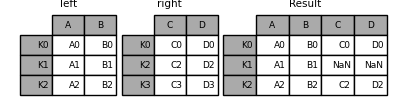
<center> Image courtesy : Pydata </center>

In [30]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                          'B': ['B0', 'B1', 'B2']},
                         index=['K0', 'K1', 'K2'])
     

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                           'D': ['D0', 'D2', 'D3']},
                          index=['K0', 'K2', 'K3'])
     

result = left.join(right)
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


<img src="https://miro.medium.com/max/7360/1*-I_1qa5TIiB5eNYxnodfAA.png" width="600" height="500"></img>


<center> Image Courtesy www.towardsdatascience.com </center> 

### References:
1. [Pandas Pydata Document](https://pandas.pydata.org/docs/user_guide/merging.html)
2. [Python Pandas DataFrame Join, Merge, and Concatenate](https://towardsdatascience.com/python-pandas-dataframe-join-merge-and-concatenate-84985c29ef78)
3. [Merge, concat, Join in pandas](https://datascience.quantecon.org/pandas/merge.html)